# Monopoly: Own it all

In this notebook, we will build a lite version of **monopoly game**. If you have never played monopoly, please read the introduction [here](https://en.wikipedia.org/wiki/Monopoly_(game)).

## A. The Board

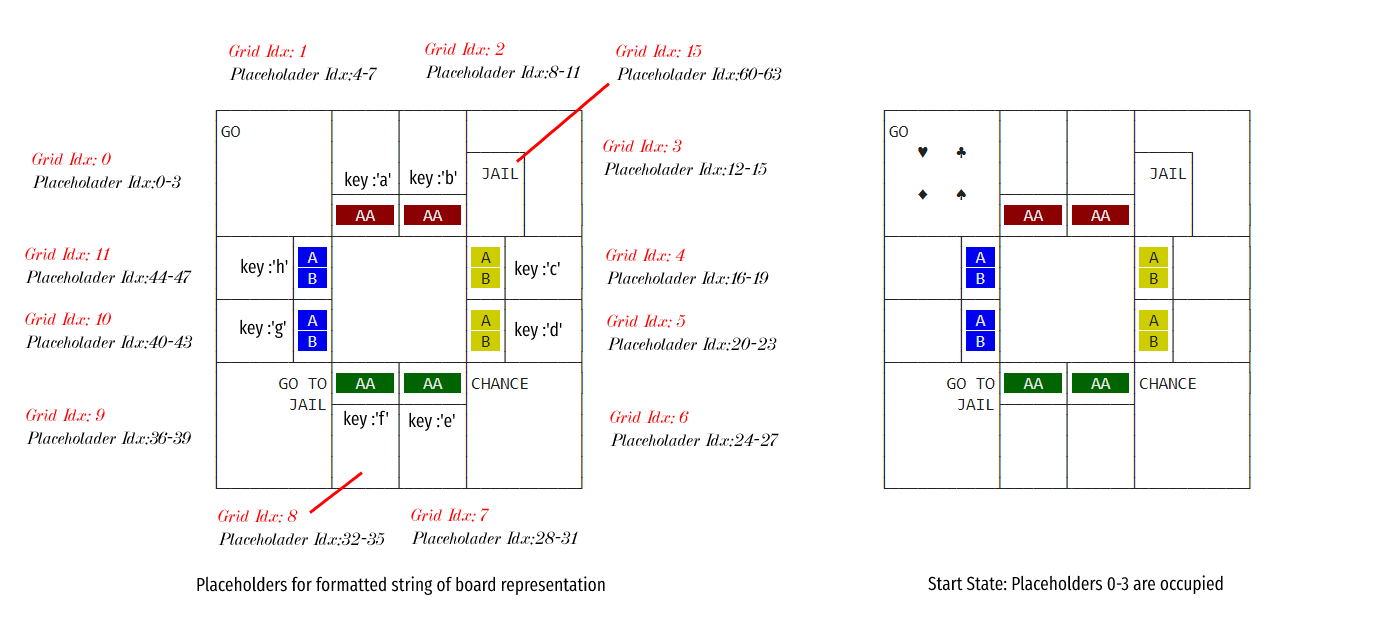

In [ ]:
class Board:
    """
    A class to represent the monopoly Board.
    ...
    Attribute
    ----------
    fString(str): a string with placeholders that records the progress of players and the grid info.

    Methods
    -------
    print_board(players,grids):
        Print the monopoly Board of the current game state.
    """
    def __init__(self):
        """
        Constructs all the necessary attributes for the Board object.
        """
        self.fString = """┌───────────┬──────┬──────┬───────────┐
│GO         │      │      │           │
│   {1}   {2}   │ {5}  {6} │ {9}  {10} ├─────┐ {13} {14} │
│           │ {7}  {4} │ {11}  {8} │ JAIL│ {15} {12} │
│   {3}   {0}   ├──────┼──────┤ {61} {62} │     │
│           │\x1B[41m\x1B[37m  {a[1]}  \033[0m│\x1B[41m\x1B[37m  {b[1]}  \033[0m│ {63} {60} │     │
├───────┬───┼──────┴──────┼───┬─┴─────┤
│  {45} {46}  │\x1B[44m\x1B[37m {h[1][0]} \033[0m│   {a[0]}{a[2]} {b[2]}{b[0]}   │\x1B[43m {c[1][0]} \033[0m│  {17} {18}  │
│  {47} {44}  │\x1B[44m\x1B[37m {h[1][1]} \033[0m│{h[0]}{h[2]}       {c[2]}{c[0]}│\x1B[43m {c[1][1]} \033[0m│  {19} {16}  │
├───────┼───┤             ├───┼───────┤
│  {41} {42}  │\x1B[44m\x1B[37m {g[1][0]} \033[0m│{g[0]}{g[2]}       {d[2]}{d[0]}│\x1B[43m {d[1][0]} \033[0m│  {21} {22}  │
│  {43} {40}  │\x1B[44m\x1B[37m {g[1][1]} \033[0m│  {f[0]}{f[2]}   {e[2]}{e[0]}  │\x1B[43m {d[1][1]} \033[0m│  {23} {20}  │
├───────┴───┼──────┬──────┼───┴───────┤
│      GO TO│\x1B[42m\x1B[37m  {f[1]}  \033[0m│\x1B[42m\x1B[37m  {e[1]}  \033[0m│CHANCE     │
│       JAIL├──────┼──────┤           │
│   {37}   {38}   │ {33}  {34} │ {29}  {30} │   {25}   {26}   │
│   {39}   {36}   │ {35}  {32} │ {31}  {28} │   {27}   {24}   │
│           │      │      │           │
└───────────┴──────┴──────┴───────────┘"""

    def print_board(self, players, grids):
        """
        Print the monopoly Board of the current game state.
        Args:
            1. players(list(Player)): a list of Player instances in order.
            2. grids(list(Grid)): a list of Grid instances in order.
        """
        playerPlaceholder = [' '] * 64 # placeholders on grids set as empty
        propertiesPlaceholder = dict(
                                    zip('abcdefgh', # keys
                                        [((grid.owner and grid.owner.get_symbol() or ' '), # items[0], symbol of owner of property
                                          grid.get_code(), # items[1], code of Property
                                          (grid.owner and grid.get_level() and str(grid.get_level()).zfill(2) or '  ')) # level of property
                                         for grid in grids if isinstance(grid,Property)] # only if the item is a Property(inherited from Grid)
                                         )
                                    )
        for idx, player in enumerate(players): # putting players on board
            if not player.is_bankrupt(): # ensure players on board are not bankrupt
                playerPlaceholder[player.get_pos() * 4 + idx] = player.get_symbol() # put the symbol of player to the corresponding grid
        print(self.fString.format(*playerPlaceholder, **propertiesPlaceholder)) # fuse the player grid progress and the property info onto the board and print it
            

## B. Grids

Grid is one of the most important elements in Monopoly game. It is the basic unit of game board where players can land on.

In [ ]:
class Grid:
    """
    A class to represent a grid on the monolopy board.
    ...
    Attribute
    ----------
    name(str): the name of the grid.

    Methods
    -------
    land(player,players):
        The action when a Player lands on the grid.
    get_name():
        Get the name of the grid.
    """
    def __init__(self, name):
        """
        Initialise the name of the Grid instance.
        Args:
            1. name(str): The name of the grid.
        """
        self.name = name
    
    def land(self, player, players):
        """
        The action when a Player lands on the grid.
        Args:
            1. player(Player): the Player that is landing on this Grid.
            2. players(list(Player)): a list of Players in this game in order.
        """
        print(f'{player.get_name()}({player.get_symbol()}) have stepped on {self.get_name()}.')
    
    def get_name(self):
        """
        Get the name of the grid.
        Returns:
            str: the name of the grid.
        """
        return self.name

## C. Properties

Property grid is a special kind of grid, where the player can buy the property, or pay the rent to the owner, or upgrade the land by building a house.

In [ ]:
class Property(Grid):
    """
    A class to represent a property grid on the monolopy board. Inherited from Grid.
    ...
    Attribute
    ----------
    name(str): the name of the property.
    price(int or float): the price of this property.
    rent(int or float): the rent other players need to pay to the owner when they step on this property.
    owner(Player): owner of this property.
    level(int): the level of this property. The higher it is the more expansive rent it has.

    Methods
    -------
    land(player,players):
        The action when a Player lands on the property.
    get_code():
        Get the 2-letter code of the property.
    get_name():
        Get the name of the property.
    get_level():
        Get the level of the property.
    """
    def __init__(self, code, name, price, rent):
        """
        Initialise the name of the Property instance.
        Args:
            1. code(str): 2-letter code representing this property
            2. name(str): The name of the grid.
            3. price(int or float): The price of this property.
            4. rent(int or float): The rent other players need to pay to the owner when they step on this property.
        """
        super().__init__(name) # calling the __init__ method of Grid class
        self.code = code
        self.price = price
        self.rent = rent
        self.owner = None
        self.level = 0 # property level
    
    def land(self, player, players):
        """
        The action when a Player lands on the property.
        Args:
            1. player(Player): the Player that is landing on this Property.
            2. players(list(Player)): a list of Players in this game in order.
        """
        super().land(player, players) # calling the land method of Grid class
        # if this property is owned, check if the owner is bankrupt
        # if so, remove the owner of this property and reset the level to 0
        if self.owner and self.owner.is_bankrupt():
            self.owner = None
            self.level = 0
        # if not owned, ask player to buy
        if not self.owner:
            self._purchase(player)
        # if owned by the player itself, ask player to upgrade
        elif player is self.owner:
            print(f'Welcome home {player.get_name()}({player.get_symbol()})')
            self._upgrade(player)
        # if owned by other player, pay the rent to the owner
        else:
            print(f"You have stepped on {self.owner.get_name()}'s({self.owner.get_symbol()}) property!")
            player.update_balance(-min(self.rent + self.rent // 8 * self.level,player.get_balance()))
            self.owner.update_balance(min(self.rent + self.rent // 8 * self.level,player.get_balance()))
    
    def _upgrade(self, player):
        """
        Asks player to upgrade the property.
        Args:
            1. player(Player): the Player(and owner) that is landing on this Property.
        """
        print(f'Upgrade fee of {self.name} is ${self.rent // 5}. Each upgrade will increase the rent by ${self.rent // 8}')
        if isinstance(player, Human):
            # if player is human, ask for input
            is_upgrade = input('Do you want to upgrade this property? (y/n) ')
        else:
            # if player is computer, make decisions based on some rules
            is_upgrade = 'y' if player.get_balance() > self.rent // 5 * 1.5 else 'n'
        if is_upgrade.lower() == 'y':
            # if player decides to upgrade
            if player.get_balance() > self.rent // 5: # if the player has enough money
                self.level += 1 
                print(f'{player.get_name()}({player.get_symbol()}) has upgraded {self.get_name()}. The rent is surging!')
                player.update_balance(-(self.rent // 5))
            else: # player has not enough money
                print("You don't have enough money.")

    def _purchase(self, player):
        """
        Asks player to buy the property.
        Args:
            1. player(Player): the Player that is landing on this Property.
        """
        print(f'{self.name} is priced at ${self.price}.\nThe rent is ${self.rent}.')
        if isinstance(player, Human):
            # if player is human, ask for input
            is_purchase = input('Do you want to buy this property? (y/n) ')
        else:
            # if player is computer, make decisions based on some rules
            is_purchase = 'y' if player.get_balance() > self.price * 1.25 else 'n'
        if is_purchase.lower() == 'y':
            # if player decides to buy
            if player.get_balance() > self.price: # if the player has enough money
                self.owner = player
                print(f'{player.get_name()}({player.get_symbol()}) has bought {self.get_name()}. Such a deal of the century!')
                player.update_balance(-self.price)
            else: # player has not enough money
                print("You don't have enough money.")
        else: # player decides not to buy
            print('This property deserves a better owner anyway...')
    
    def get_code(self):
        """
        Get the 2-letter code of the property.
        Returns:
            str: the 2-letter code
        """
        return self.code
    
    def get_level(self):
        """
        Get the level of the property.
        Returns:
            int: the level
        """
        return self.level


## D. Chance

Chance grid is another special kind of grid, where miracle happens.

In [ ]:
import random
class Chance(Grid):
    """
    A class to represent a chance grid on the monolopy board. Inherited from Grid.
    ...
    Attribute
    ----------
    name(str): set to 'Chance'.

    Methods
    -------
    land(player,players):
        The action when a Player lands on the chance grid.
    """

    def __init__(self):
        super().__init__('Chance')
    
    def land(self, player, players):
        """
        The action when a Player lands on the Chance grid, this is where miracle happens.
        Args:
            1. player(Player): the Player that is landing on this grid.
            2. players(list(Player)): a list of Players in this game in order.
        """
        super().land(player, players)
        the_chance = random.randint(1,7) #roll the dice
        if the_chance == 1:
            # move n step forward
            step = random.randint(1,6)
            print(f'Chance: Move {step} steps forward.')
            player.move(step)
            return True
        elif the_chance == 2:
            # move n step backwards
            step = random.randint(1,6)
            print(f'Chance: Move {step} steps backwards.')
            player.move(step * -1)
            return True
        elif the_chance == 3:
            # player gets $150
            print('Chance: Your loan matures. Collect $150.')
            player.update_balance(150)
        elif the_chance == 4:
            # player pays $50 to other players
            print('Chance: You have been elected Chairman of the Board. Pay each player $50.')
            total = max(-50 * (len([p for p in players if not p.is_bankrupt()]) - 1), -player.get_balance())
            player.update_balance(total)
            for p in players:
                if not p.is_bankrupt() and p is not player:
                    p.update_balance((-total)//(len([p for p in players if not p.is_bankrupt()]) - 1))
        elif the_chance == 5:
            # go to jail
            print('Chance: Go to jail. Do not pass GO, do not collect $200.')
            player.set_pos(15)
        elif the_chance >= 6:
            # lose $300, 2/7 chance
            print('Chance: You lose $200 because of unsuccessul investment.')
            player.update_balance(-min(player.get_balance(),200))


## E. Go To Jail Grid

Go to jail grid relocates the player to the jail grid...

In [ ]:
class GoToJail(Grid):
    """
    A class to represent the go-to-jail grid on the monolopy board. Inherited from Grid.
    ...
    Attribute
    ----------
    name(str): set to 'Go To Jail'.

    Methods
    -------
    land(player,players):
        The action when a Player lands on the go-to-jail grid.
    """
    def __init__(self):
        super().__init__('Go To Jail')

    def land(self, player, players):
        """
        The action when a Player lands on the Chance grid, this is where miracle happens.
        Args:
            1. player(Player): the Player that is landing on this grid.
            2. players(list(Player)): a list of Players in this game in order.
        """
        print(f'Oh no! {player.get_name()}({player.get_symbol()}) is going to jail.')
        player.set_pos(15) # set player position to grid 15(Jail) and won't pass go

## F. Player

Apart from Grid, Player is another important element of the Monopoly game. This class stores information of the player, including the current grid position, name, and available cash. The player can also roll the dice and move to another Grid.

In [ ]:
import random

class Player:
    """
    A class to represent the player. 
    ...
    Attribute
    ----------
    bankrupt(bool): indicator of whether the player is bankrupt.
    cash(float): available money of the player.
    symbol(str): the symbol that represents the player on game board.
    name(str): name of player.
    current_pos(int): the current grid index of player.

    Methods
    -------
    roll_die():
        Generates a random step number from 1 to 6(inclusive) for the player.
    move(step):
        Moves the player location according to step. Reset the index and add money when passing "Go".
    set_pos(idx):
        Sets the player to specific grid according to the grid index. No reset index.
    get_balance():
        Gets the current amount of cash the player has.
    get_symbol():
        Gets the symbol of the player.
    get_pos():
        Gets the current grid index location of the player.
    is_bankrupt():
        Returns the indicator of whether the player is bankrupt.
    update_balance(amount):
        ADDS the player cash by amount. Negative amount means the player is paying.
    get_name():
        Gets the name of the player.
    """
    def __init__(self, symbol, name, cash = 2000):
        """
        Initialise the attributes of the Player instance.
        Args:
            1. symbol(str): The symbol representing this player
            2. name(str): The name of the player.
            3. cash(int or float): The amount of cash this player has, default as 2000.
        """
        self.bankrupt = False
        self.cash = cash
        self.symbol = symbol
        self.name = name
        self.current_pos = 0

    def roll_die(self):
        """
        Generates a random step number from 1 to 6(inclusive) for the player.
        """
        step = random.randint(1, 6)
        print(f'Player {self.get_symbol()} is rolling a {step}!')
        if self.current_pos == 15:
            # in jail
            if step < 3:
                print('Such a shame! Better luck and roll a 3/4/5 next time to get out of jail. You need to pay $100 for the stay.')
                self.update_balance(-min(self.get_balance(),100)) # pay $100
            else: 
                # get out of jail
                print(f'{self.get_name()}({self.get_symbol()}) is bailed out of jail!')
                self.move(step)
        else:
            # not in jail
            self.move(step)

    def move(self, step):
        """
        Moves the player location according to step. Reset the index and add money when passing "Go".
        Args:
            1. step(int): number of steps forward. Negative number means going backwards.
        """
        if step > 0:
            print(f'Log: {self.get_name()}({self.get_symbol()}) moving {step} steps forward.')
        elif step < 0:
            print(f'Log: {self.get_name()}({self.get_symbol()}) moving {step * -1} steps backwards.')
        self.current_pos += step
        if self.current_pos / 12 >= 1 and self.current_pos - step != 15:
            # pass GO, get 100
            print(f'Log: {self.get_name()}({self.get_symbol()}) getting $100 for passing GO.')
            self.cash += 100
        self.current_pos = self.current_pos % 12 # Reset index when the index exceeds 11 because the maximum index is 11(except jail)

    def set_pos(self, idx):
        """
        Sets the player to specific grid according to the grid index. No reset index.
        Args:
            1. idx(int): the grid index for the player to go.
        """
        self.current_pos = idx

    def get_balance(self):
        """
        Gets the current amount of cash the player has.
        Returns:
            float: the amount of cash the player has
        """
        return self.cash
    
    def get_symbol(self):
        """
        Gets the symbol of the player.
        Returns:
            str: the symbol representing the player.
        """
        return self.symbol

    def get_pos(self):
        """
        Gets the current grid index location of the player.
        Returns:
            int: the current grid index of player standing on.
        """
        return self.current_pos
    
    def is_bankrupt(self):
        """
        Returns the indicator of whether the player is bankrupt.
        Returns:
            bool: True if the player is bankrupt, False otherwise
        """
        return self.bankrupt

    def update_balance(self, amount):
        """
        ADDS the player cash by amount. Negative amount means the player is paying.
        Args:
            1. amount(int or float): The amount of cash paying or receiving.
        """
        if amount > 0:
            print(f'Log: {self.get_name()}({self.get_symbol()}) getting ${amount}.')
        elif amount < 0:
            print(f'Log: {self.get_name()}({self.get_symbol()}) paying ${amount*-1}.')
        self.cash += amount
        if self.get_balance() <= 0: # check if the player is bankrupt after updating balance
            print(f'Log: {self.get_name()}({self.get_symbol()}) is bankrupt.')
            self.bankrupt = True

    def get_name(self):
        """
        Gets the name of the player.
        Returns:
            str: the name of player.
        """
        return self.name

Human is a kind of Player, which needs to press "enter" to roll the dice(for aesthetic purposes only), and make decisions by entering input.

In [ ]:
class Human(Player):
    """
    A class to represent a human player. Inherited from Player class. 
    ...
    Attribute
    ----------
    bankrupt(bool): indicator of whether the player is bankrupt.
    cash(float): available money of the player.
    symbol(str): the symbol that represents the player on game board.
    name(str): name of player.
    current_pos(int): the current grid index of player.

    Methods
    -------
    roll_die():
        Asks for player to press enter and generates a random step number from 1 to 6(inclusive) for the player.
    move(step):
        Moves the player location according to step. Reset the index and add money when passing "Go".
    set_pos(idx):
        Sets the player to specific grid according to the grid index. No reset index.
    get_balance():
        Gets the current amount of cash the player has.
    get_symbol():
        Gets the symbol of the player.
    get_pos():
        Gets the current grid index location of the player.
    is_bankrupt():
        Returns the indicator of whether the player is bankrupt.
    update_balance(amount):
        ADDS the player cash by amount. Negative amount means the player is paying.
    get_name():
        Gets the name of the player.
    """
    def __init__(self, symbol, name, cash = 2000):
        super().__init__(symbol,name,cash)
    
    def roll_die(self):
        ask_roll = input('Please press enter to roll the die')
        super().roll_die()

AI is another kind of Player, which rolls the dice and make decisions automatically.

In [ ]:
class AI(Player):
    def __init__(self, symbol, name, cash = 2000):
        super().__init__(symbol,name,cash)

## G. Game

The game won't start without the Game class!

This class initialise the game board and players.

In [ ]:
import time
from IPython.display import clear_output
class Game:
    """
    A class to represent a Monopoly game. 
    ...
    Attribute
    ----------
    players(list[Player]): A list of players in this game. (at most 4)
    grids(list[Grid]): A list of Grids on the board.
    board(Board): A game board

    Methods
    -------
    set_players():
        Initialises the Players. If there are n <= 4 Human players, there will be 4-n AI players.
    check_win(is_max = False):
        Checks who is the winner of the Game. If is_max is True, then the winner will be determined by who has the maximum amount of cash.
    update_grids():
        Checks if any Grid's owner has been bankrupt, and reset those properties as unowned.
    print_balance():
        Print the amount of cash of each player.
    start_game():
        Starts the game!
    """
    def __init__(self):
        self.players = []
        self.grids = [Grid('GO'),
                      Property('NY','New York', 350, 170),
                      Property('LN','London', 370, 190),
                      Grid('JAIL VISIT'),
                      Property('HK','Hong Kong', 400, 220),
                      Property('JS','Jerusalem', 420, 240),
                      Chance(),
                      Property('BG','Belgrade', 450, 270),
                      Property('CT','Cape Town', 470, 290),
                      GoToJail(),
                      Property('RG','Riga', 500, 340),
                      Property('MT','Montreal ', 530, 380),
                      None,
                      None,
                      None,
                      Grid('Jail')]
        self.board = Board()

    def set_players(self):
        symbols = ['♠','♥','♣','♦']
        num_players = input('How many players are there in this game? ')
        while not num_players.isdigit():
            num_players = input('How many players are there in this game? ')
        num_players = min(4,max(0,int(num_players)))
        for i in range(num_players):
            the_name = input('Please enter your name: ')
            print(f'May the odds be in your favour, {the_name}. Your symbol will be {symbols[i]}')
            self.players.append(Human(symbols[i],the_name))
        for i in range(num_players, 4):
            print(f'AI{i-num_players}({symbols[i]}) has been added to the game.')
            self.players.append(AI(symbols[i],f'AI{i-num_players}'))
    
    def check_win(self, is_max = False):
        player_in_game = []
        for p in self.players:
            if not p.is_bankrupt():
                player_in_game.append(p)
        player_in_game = sorted(player_in_game, key = lambda x: x.get_balance(), reverse=True)
        if len(player_in_game) == 1 or is_max:
            return player_in_game.pop()
        else:
            return False

    def update_grids(self):
        for grid in self.grids:
            if isinstance(grid,Property) and grid.owner and grid.owner.is_bankrupt():
                grid.owner = None
                grid.level = 0 # reset level

    def print_balance(self,current_player):
        print('Player   Cash')
        for p in self.players:
            print("{}{}        {}{}".format('\u001b[1m' if p is current_player else '', p.get_symbol(), p.get_balance(), '\033[0m' if p is current_player else ''))
        
    def start_game(self):
        self.set_players()
        print('Let the game begin.')
        time.sleep(1)
        player_idx = 0
        self.board.print_board(self.players, self.grids)
        time.sleep(2)
        while not self.check_win() and player_idx < 10000:
            current_player = self.players[player_idx % 4]
            if current_player.is_bankrupt():
                player_idx += 1
                continue
            clear_output(wait=True)
            self.print_balance(current_player)
            self.board.print_board(self.players, self.grids)
            current_player.roll_die()
            time.sleep(1)
            while self.grids[current_player.get_pos()].land(current_player, self.players):
                self.update_grids()
                time.sleep(1)
                clear_output(wait=True)
                self.print_balance(current_player)
                self.board.print_board(self.players, self.grids)
            
            time.sleep(1)
            self.update_grids()
            clear_output(wait=True)
            self.print_balance(current_player)
            self.board.print_board(self.players, self.grids)
            time.sleep(1)
            player_idx += 1
        print('Seems like we have a winner here.....')
        time.sleep(2)
        print(f'Congratulations. {self.check_win(True).get_name()}({self.check_win(True).get_symbol()})')

In [ ]:
g = Game()
g.start_game()